Code adapted from https://tavareshugo.github.io/data-carpentry-rnaseq/03_rnaseq_pca.html

In [1]:
library(tidyverse)
library(ggfortify)

── Attaching packages ────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
quant_matrix <- read.csv("../data/rsem/quant_matrix.csv", header = T)
sample_info <- read.csv("../data/sample_info.csv", header = T)

head(quant_matrix)
head(sample_info)

,gene_id,SRR10079579,SRR10079580,SRR10079581,SRR10079582,SRR10079583,SRR10079584,SRR10079585,SRR10079586,SRR10079587,⋯,SRR10079629,SRR10079630,SRR10079631,SRR10079632,SRR10079633,SRR10079634,SRR10079635,SRR10079636,SRR10079637,SRR10079638
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0610005C13Rik,0.00,0.00,0.11,0.12,0.13,0.00,0.07,0.00,0.09,⋯,0.24,0.71,0.61,0.31,0.26,0.00,0.00,0.76,0.60,0.40
2,0610006L08Rik,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.09,0.00,0.09,0.00,0.00,0.00,0.00,0.00,0.00
3,0610007P14Rik,25.72,28.72,33.26,27.29,36.56,29.67,37.23,38.32,41.11,⋯,97.26,114.37,113.46,116.98,81.56,89.09,105.20,119.94,102.91,88.46
4,0610009B22Rik,94.54,94.27,119.30,69.56,96.12,79.32,111.62,115.56,101.60,⋯,108.15,124.74,130.35,131.18,129.32,132.42,134.02,138.96,123.11,108.27
5,0610009E02Rik,0.24,0.25,0.23,0.36,0.51,0.52,0.10,0.49,0.44,⋯,2.62,1.21,2.84,1.82,1.42,0.82,0.75,2.10,2.10,0.69
6,0610009L18Rik,7.68,16.09,7.85,10.92,13.54,6.86,13.11,9.81,10.33,⋯,33.30,22.13,36.73,16.58,23.77,26.82,32.26,32.93,34.86,22.92


,run,sample,strain,month,cell,replicate
,<chr>,<chr>,<chr>,<int>,<chr>,<int>
1,SRR10079579,WT2m1M,WT,2,microglia,1
2,SRR10079580,WT2m2M,WT,2,microglia,2
3,SRR10079581,WT2m3M,WT,2,microglia,3
4,SRR10079582,WT4m1M,WT,4,microglia,1
5,SRR10079583,WT4m2M,WT,4,microglia,2
6,SRR10079584,WT4m3M,WT,4,microglia,3


In [3]:
pca_matrix <- quant_matrix %>%
  column_to_rownames("gene_id") %>%
  as.matrix() %>%
  t()

head(pca_matrix)

,0610005C13Rik,0610006L08Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010B08Rik,0610010F05Rik,0610010K14Rik,⋯,n-R5s134,n-R5s136,n-R5s138,n-R5s139,n-R5s141,n-R5s142,n-R5s143,n-R5s144,n-R5s146,n-R5s149
SRR10079579,0.00,0,25.72,94.54,0.24,7.68,3.61,0.36,3.65,141.38,⋯,0,0,0,0,0,0,0,0,0,0
SRR10079580,0.00,0,28.72,94.27,0.25,16.09,3.00,1.10,5.64,151.89,⋯,0,0,0,0,0,0,0,0,0,0
SRR10079581,0.11,0,33.26,119.30,0.23,7.85,4.26,0.49,3.72,162.32,⋯,0,0,0,0,0,0,0,0,0,0
SRR10079582,0.12,0,27.29,69.56,0.36,10.92,3.27,0.54,3.08,122.38,⋯,0,0,0,0,0,0,0,0,0,0
SRR10079583,0.13,0,36.56,96.12,0.51,13.54,5.26,0.68,6.24,157.94,⋯,0,0,0,0,0,0,0,0,0,0
SRR10079584,0.00,0,29.67,79.32,0.52,6.86,5.30,1.09,5.37,140.65,⋯,0,0,0,0,0,0,0,0,0,0


In [4]:
pca <- prcomp(pca_matrix)

In [5]:
pc_eigenvalues <- pca$sdev^2
top_var <- pc_eigenvalues[c(1:25)]

# create a "tibble" manually with 
# a variable indicating the PC number
# and a variable with the variances
pc_eigenvalues <- tibble(PC = factor(1:length(top_var)), 
                         variance = top_var) %>% 
  # add a new column with the percent variance
  mutate(pct = variance/sum(variance)*100) %>% 
  # add another column with the cumulative variance explained
  mutate(pct_cum = cumsum(pct))

# print the result
head(pc_eigenvalues)

PC,variance,pct,pct_cum
<fct>,<dbl>,<dbl>,<dbl>
1,8254316472,94.8394982,94.83950
2,174110436,2.0004741,96.83997
3,83976057,0.9648585,97.80483
4,52652298,0.6049583,98.40979
5,31345246,0.3601470,98.76994
6,22325092,0.2565083,99.02644


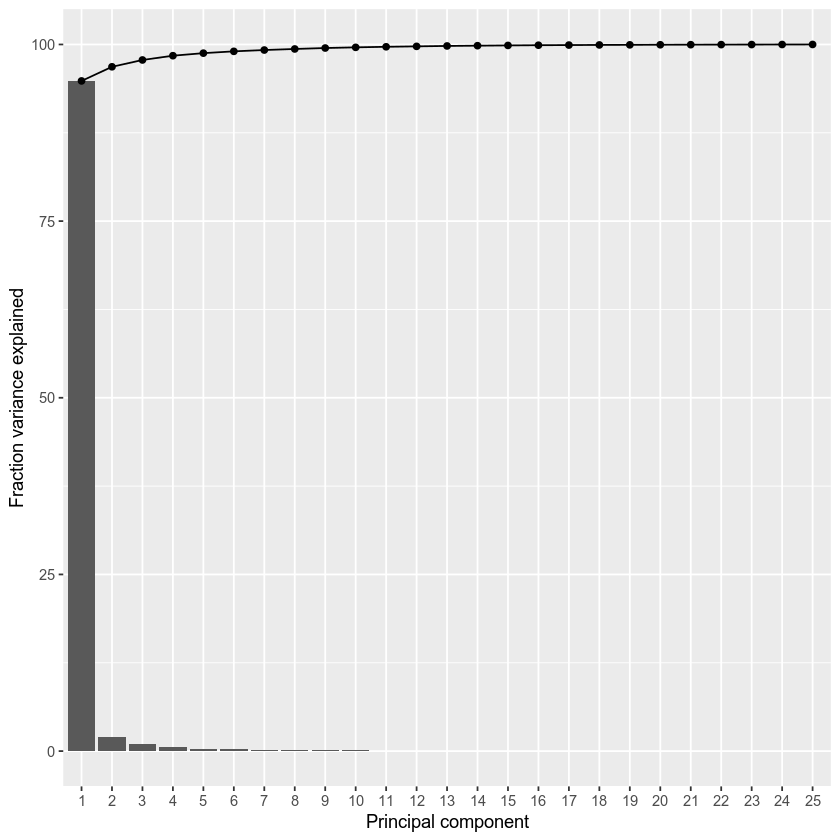

In [6]:
pc_eigenvalues %>% 
  ggplot(aes(x = PC)) +
  geom_col(aes(y = pct)) +
  geom_line(aes(y = pct_cum, group = 1)) + 
  geom_point(aes(y = pct_cum)) +
  labs(x = "Principal component", y = "Fraction variance explained")

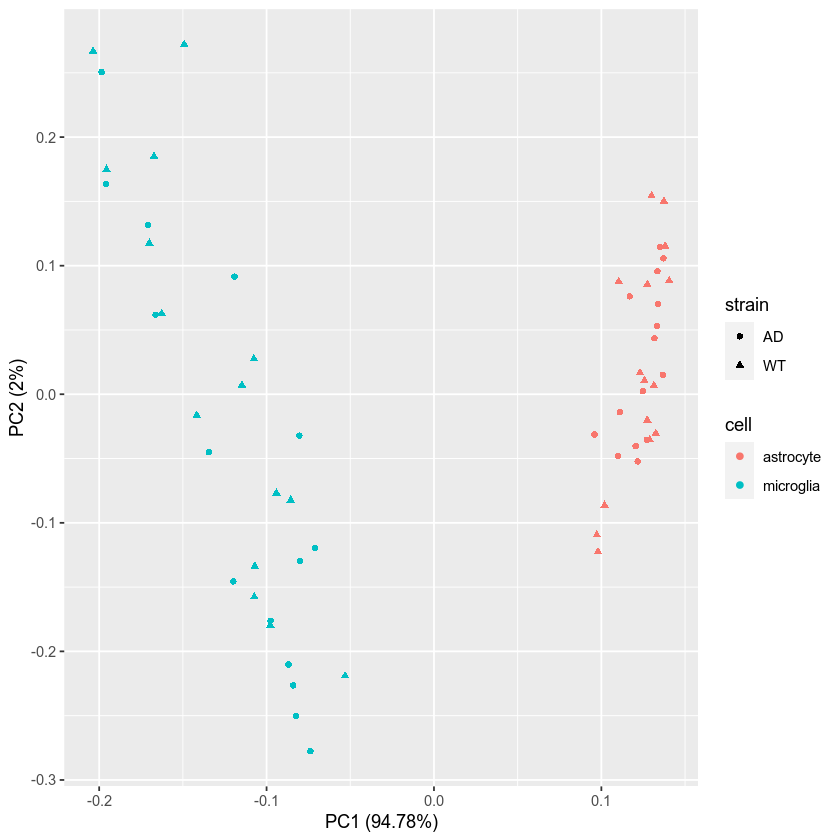

In [7]:
autoplot(pca, data = sample_info, colour = "cell", shape = "strain")